In [14]:
from TunerFish_utils import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
AUDIO_DIR = "D:\\fma_test" # directory for fma music

# location of the track metadata that came along with the fma dataset
TRACK_METADATA = "D:\\fma_metadata\\tracks.csv" 

# location of the genre metadata that came along with the fma dataset
GENRE_METADATA = "D:\\fma_metadata\\genres.csv"

FEATURES_METADATA = "D:\\fma_metadata\\features.csv"

ECHONEST_METADATA = "D:\\fma_metadata\\echonest.csv"

**Top 5 genres**

In [47]:
# loading metadata into data frames
tracks = load_metadata(TRACK_METADATA)
genres = load_metadata(GENRE_METADATA)
features = load_metadata(FEATURES_METADATA)
echonest = load_metadata(ECHONEST_METADATA)

In [48]:
# getting genre for each song in the features dataframe
genre_list = []
for song in features.index.values:
    song_genre = (song, get_genre_for_current_song(tracks, genres, song))
    genre_list.append(song_genre)

In [49]:
drop_songs = [] # the songs that aren't classified as electronic or rock
true_genre_list = [] # the songs that are
for genre in genre_list:
    if "electronic" == genre[1].lower() or "rock" == genre[1].lower() or "folk" == genre[1].lower() or "pop" == genre[1].lower() or "hip-hop" == genre[1].lower():
        true_genre_list.append(genre[1])
    else:
        drop_songs.append(genre[0])

In [50]:
features = features.drop(drop_songs) # drop the songs in drop_songs from the features data frame

In [56]:
# converting labels into categorical data and converting to numpy array
Y = to_categorical(true_genre_list)
# converting features to numpy array
X = transform_to_matrix(features)

In [52]:
# Splitting training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

# Creating a random forest classifier
rclf = RandomForestClassifier(n_estimators=150)
rclf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
rclf.score(X_test, Y_test)

0.6747161546884906

Confusion matrix, without normalization
[[6055  118   26   24  511]
 [ 468  989    4   41  365]
 [1054   18  314    1  106]
 [ 832  236   11  114  580]
 [ 998  221    6   24 4235]]


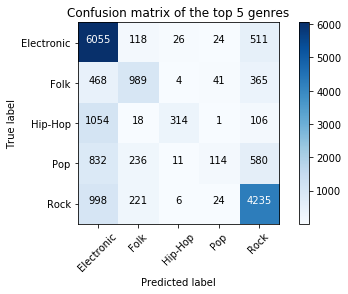

In [54]:
pred = rclf.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, pred)
class_names = ["Electronic", "Folk", "Hip-Hop", "Pop", "Rock"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion matrix of the top 5 genres")

Normalized confusion matrix
[[8.99168399e-01 1.75230175e-02 3.86100386e-03 3.56400356e-03
  7.58835759e-02]
 [2.50669523e-01 5.29726834e-01 2.14247456e-03 2.19603642e-02
  1.95500803e-01]
 [7.05961152e-01 1.20562626e-02 2.10314802e-01 6.69792364e-04
  7.09979906e-02]
 [4.69261139e-01 1.33107727e-01 6.20417372e-03 6.42978003e-02
  3.27129160e-01]
 [1.81983953e-01 4.02990518e-02 1.09409190e-03 4.37636761e-03
  7.72246535e-01]]


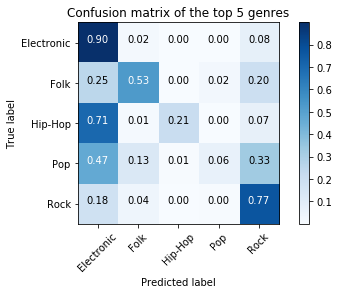

In [55]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title="Confusion matrix of the top 5 genres")

**Top 2 genres**

In [38]:
# loading metadata into data frames
tracks = load_metadata(TRACK_METADATA)
genres = load_metadata(GENRE_METADATA)
features = load_metadata(FEATURES_METADATA)
echonest = load_metadata(ECHONEST_METADATA)

In [39]:
# getting genre for each song in the features dataframe
genre_list = []
for song in features.index.values:
    song_genre = (song, get_genre_for_current_song(tracks, genres, song))
    genre_list.append(song_genre)

In [40]:
drop_songs = [] # the songs that aren't classified as electronic or rock
true_genre_list = [] # the songs that are
for genre in genre_list:
    if "electronic" == genre[1].lower() or "rock" == genre[1].lower():
        true_genre_list.append(genre[1])
    else:
        drop_songs.append(genre[0])

In [41]:
features = features.drop(drop_songs) # drop the songs in drop_songs from the features data frame

In [42]:
# converting labels into categorical data and converting to numpy array
Y = to_categorical(true_genre_list)
# converting features to numpy array
X = transform_to_matrix(features)

In [43]:
# Splitting training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

# Creating a random forest classifier
rclf = RandomForestClassifier(n_estimators=150)
rclf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
rclf.score(X_test, Y_test)

0.8668255011501808

Confusion matrix, without normalization
[[6158  542]
 [1079 4393]]


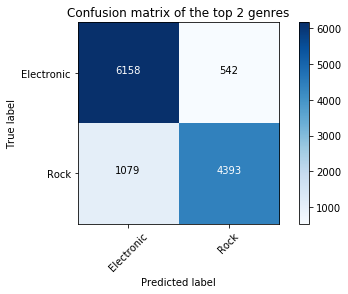

In [45]:
pred = rclf.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, pred)
class_names = ["Electronic", "Rock"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion matrix of the top 2 genres")

Normalized confusion matrix
[[0.91910448 0.08089552]
 [0.19718567 0.80281433]]


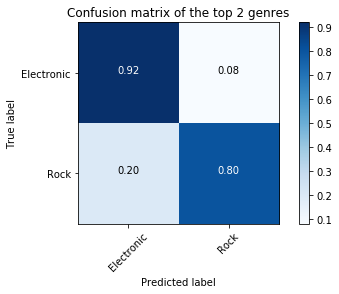

In [46]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title="Confusion matrix of the top 2 genres")